# import

In [84]:
import matplotlib.pyplot as plt
from io import BytesIO
import base64
from PIL import Image
import requests

# send api resquest and get response

In [85]:
API_URL = "https://iqf1uezcub.execute-api.us-east-1.amazonaws.com/stage/run_a1_shadow_analysis"
response = requests.get(API_URL, timeout=100000)
# User receives a list of base64 encoded images of the visualization of shadow analysis
VisualizedImages = None

# Check the response status code
if response.status_code == 200:
    print("Request was successful!")
    json_data = response.json()
    print('Message: ', json_data["Message"])
    VisualizedImages = json_data['VisualizedImages']
else:
    print(f"Request failed with status code: {response.status_code}")

Request was successful!
Message:  API run successfully!


# show images

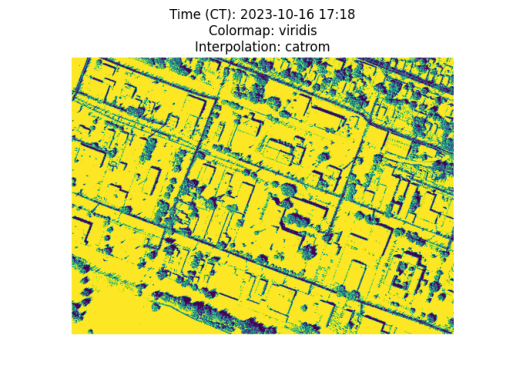

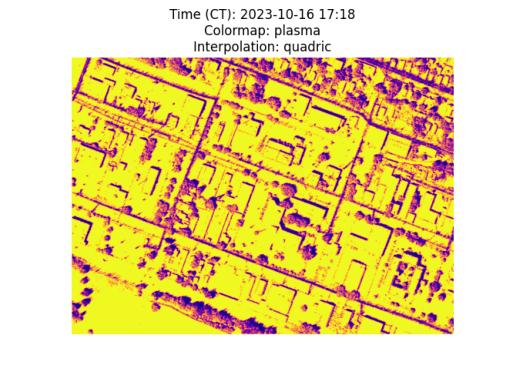

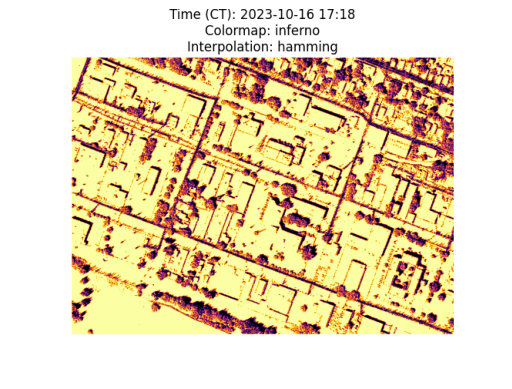

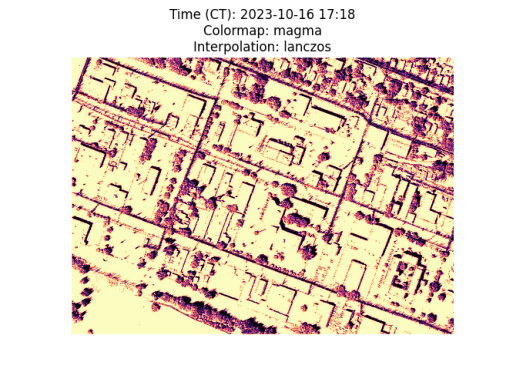

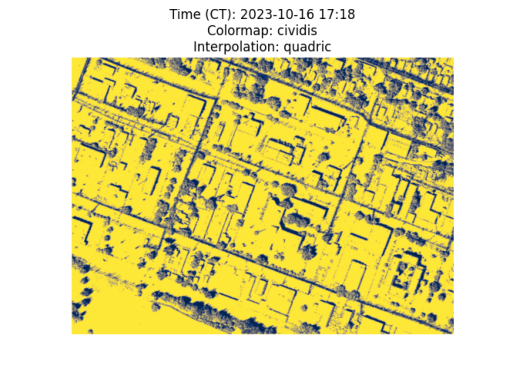

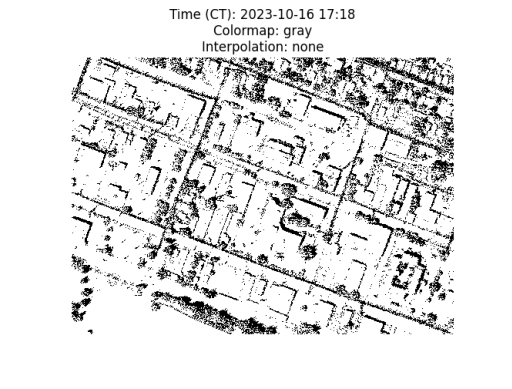

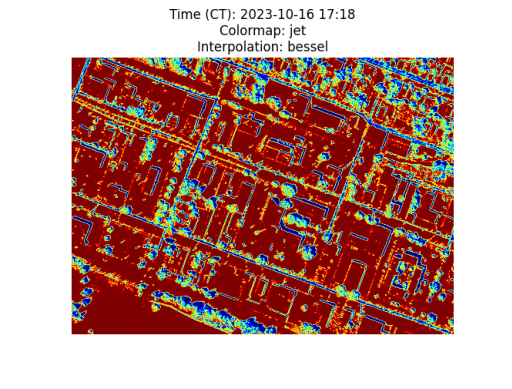

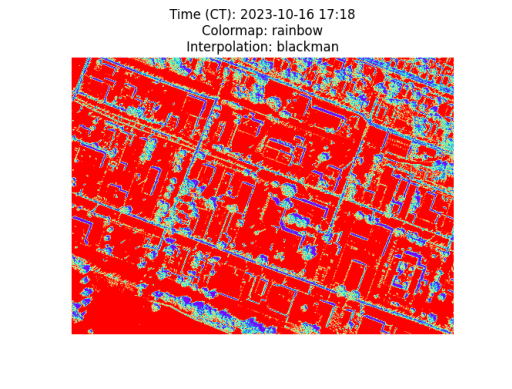

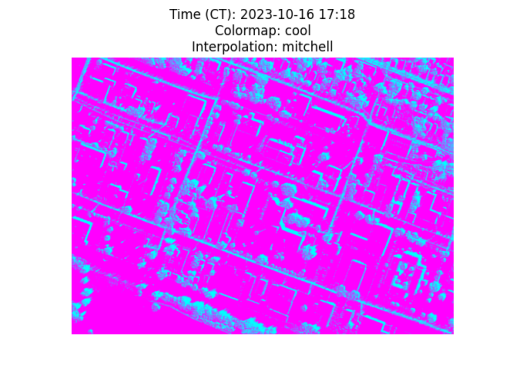

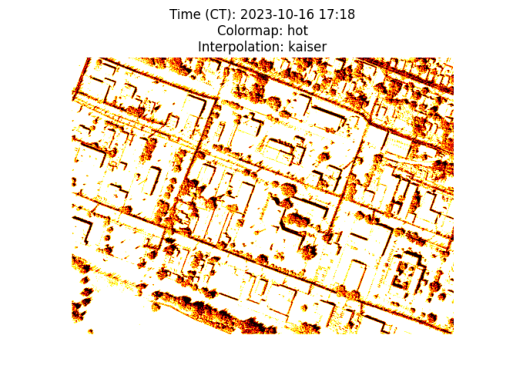

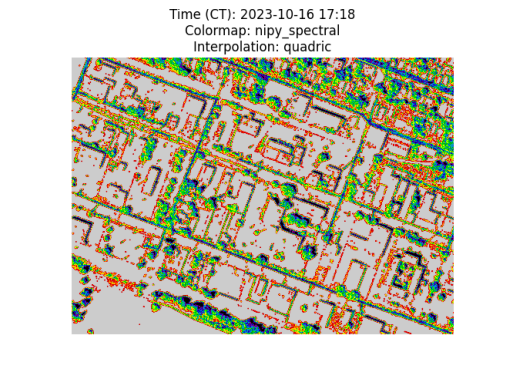

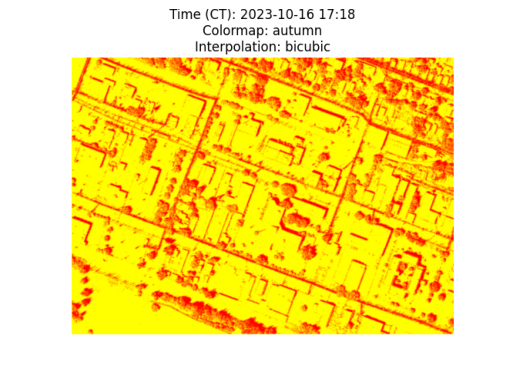

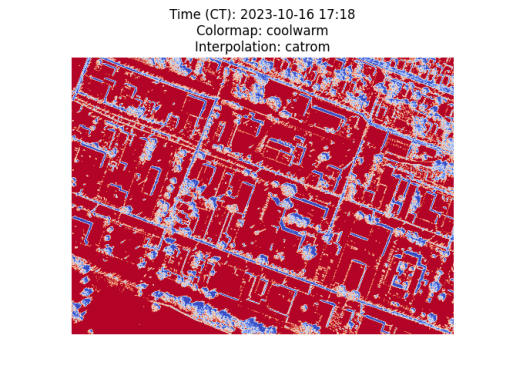

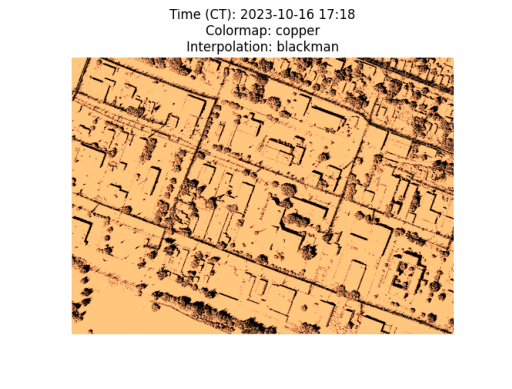

In [86]:
for VisualizedImage in VisualizedImages:
    # Each image is encoded as a base64 string
    img_base64 = VisualizedImage
    img_data = base64.b64decode(img_base64)
    img_stream = BytesIO(img_data)
    img = Image.open(img_stream)
    # Display the image using matplotlib
    plt.imshow(img)
    plt.axis('off')
    plt.show()